In [2]:
#https://colab.research.google.com/drive/1Bk4zPQwAfzoSHZokKUefKL1s6lqmam6S?usp=sharing

import pandas as pd

df = pd.read_csv('NFLX_2.csv')
df

,Date,Open,High,Low,Close,Volume,SMA30,SMA8,EMA50,EMA12,K,D,RSI,Month,Year,Day,Day_Name
0,2018-03-19,315.799988,317.000000,307.339996,313.480011,9925200,291.264666,320.023750,299.206963,314.170719,59.605911,67.868628,62.913629,3,2018,19,1
1,2018-03-20,313.260010,319.500000,312.799988,317.500000,5991900,293.372666,320.086250,300.216405,314.685819,67.527072,65.510667,64.226588,3,2018,20,2
2,2018-03-21,316.350006,319.399994,314.510010,316.480011,5263900,295.064667,318.216251,301.099756,314.963171,65.517241,64.216742,64.205607,3,2018,21,3
3,2018-03-22,313.070007,314.119995,305.660004,306.700012,8063300,296.469334,316.391254,301.399407,313.686766,25.013757,52.686023,53.106117,3,2018,22,4
4,2018-03-23,307.410004,309.369995,300.359985,300.940002,9529900,298.164000,314.523754,301.375172,311.719007,1.725213,30.752070,41.505554,3,2018,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500,527.323000,402.152504,539.286213,435.893139,39.251083,24.587551,29.680923,1,2022,31,1
976,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300,523.003001,395.762504,536.064401,439.160349,54.805248,37.039918,36.337520,2,2022,1,2
977,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000,517.527668,399.760006,531.884621,437.671066,41.208485,45.088272,33.694538,2,2022,2,3
978,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200,510.883669,402.066257,526.932283,432.737057,28.965820,41.659851,33.107304,2,2022,3,4


In [3]:

df = df[['Date','Close','Day','Month']]

df

,Date,Close,Day,Month
0,2018-03-19,313.480011,19,3
1,2018-03-20,317.500000,20,3
2,2018-03-21,316.480011,21,3
3,2018-03-22,306.700012,22,3
4,2018-03-23,300.940002,23,3
...,...,...,...,...
975,2022-01-31,427.140015,31,1
976,2022-02-01,457.130005,1,2
977,2022-02-02,429.480011,2,2
978,2022-02-03,405.600006,3,2


In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2018-03-19')
datetime_object

datetime.datetime(2018, 3, 19, 0, 0)

In [5]:
df['Date'] = df['Date'].apply(str_to_datetime)
df.index = df.pop('Date')
df

C:\Users\mikol\AppData\Local\Temp\ipykernel_15968\1681952533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Close,Day,Month
Date,,,
2018-03-19,313.480011,19,3
2018-03-20,317.500000,20,3
2018-03-21,316.480011,21,3
2018-03-22,306.700012,22,3
2018-03-23,300.940002,23,3
...,...,...,...
2022-01-31,427.140015,31,1
2022-02-01,457.130005,1,2
2022-02-02,429.480011,2,2


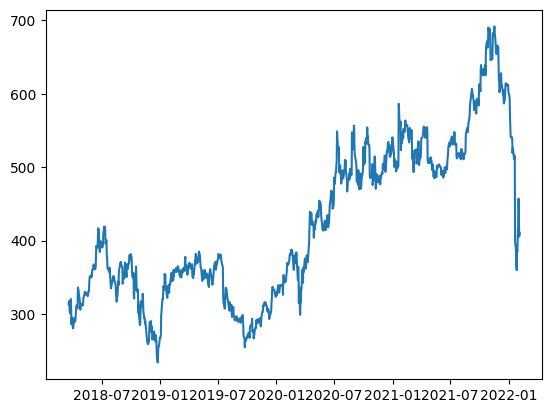

In [6]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [7]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

n_features = 100
windowed_df = df_to_windowed_df(df, 
                                '2018-10-10	', 
                                '2022-02-04', 
                                n_features)

windowed_df

C:\Users\mikol\AppData\Local\Temp\ipykernel_15968\1103274364.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Target-{n-i}'] = X[:, i]
C:\Users\mikol\AppData\Local\Temp\ipykernel_15968\1103274364.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df['Target'] = Y


,Target Date,Target-100,Target-99,Target-98,Target-97,Target-96,Target-95,Target-94,Target-93,Target-92,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2018-10-10,324.179993,331.820007,331.619995,344.720001,349.290009,351.290009,349.730011,353.540009,351.600006,...,380.709991,374.130005,381.429993,377.140015,377.049988,363.649994,351.350006,349.100006,355.709991,325.890015
1,2018-10-11,331.820007,331.619995,344.720001,349.290009,351.290009,349.730011,353.540009,351.600006,359.929993,...,374.130005,381.429993,377.140015,377.049988,363.649994,351.350006,349.100006,355.709991,325.890015,321.100006
2,2018-10-12,331.619995,344.720001,349.290009,351.290009,349.730011,353.540009,351.600006,359.929993,361.809998,...,381.429993,377.140015,377.049988,363.649994,351.350006,349.100006,355.709991,325.890015,321.100006,339.559998
3,2018-10-15,344.720001,349.290009,351.290009,349.730011,353.540009,351.600006,359.929993,361.809998,365.799988,...,377.140015,377.049988,363.649994,351.350006,349.100006,355.709991,325.890015,321.100006,339.559998,333.130005
4,2018-10-16,349.290009,351.290009,349.730011,353.540009,351.600006,359.929993,361.809998,365.799988,367.450012,...,377.049988,363.649994,351.350006,349.100006,355.709991,325.890015,321.100006,339.559998,333.130005,346.399994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,2022-01-31,606.049988,597.539978,598.719971,589.289978,577.760010,582.869995,586.500000,589.349976,575.429993,...,510.799988,515.859985,508.250000,397.500000,387.149994,366.420013,359.700012,386.700012,384.359985,427.140015
833,2022-02-01,597.539978,598.719971,589.289978,577.760010,582.869995,586.500000,589.349976,575.429993,573.140015,...,515.859985,508.250000,397.500000,387.149994,366.420013,359.700012,386.700012,384.359985,427.140015,457.130005
834,2022-02-02,598.719971,589.289978,577.760010,582.869995,586.500000,589.349976,575.429993,573.140015,590.650024,...,508.250000,397.500000,387.149994,366.420013,359.700012,386.700012,384.359985,427.140015,457.130005,429.480011
835,2022-02-03,589.289978,577.760010,582.869995,586.500000,589.349976,575.429993,573.140015,590.650024,593.260010,...,397.500000,387.149994,366.420013,359.700012,386.700012,384.359985,427.140015,457.130005,429.480011,405.600006


In [8]:
import numpy as np

def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape


((837,), (837, 100, 1), (837,))

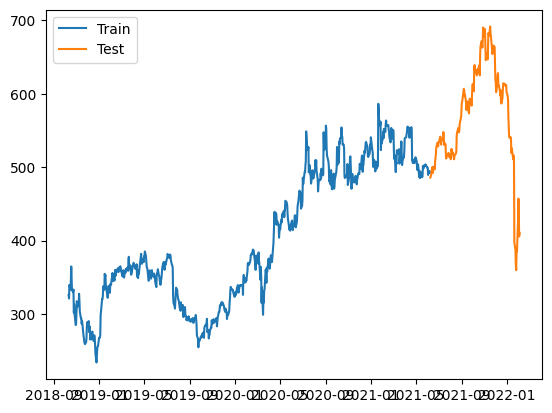

In [9]:

q = int(len(dates) * 0.8)

dates_train, X_train, y_train = dates[:q], X[:q], y[:q]
dates_test, X_test, y_test = dates[q:], X[q:], y[q:]

plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Test'])

In [10]:
print(X_train.shape)

(669, 100, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((n_features, 1)),                   #n_features - number of features
                    layers.LSTM(64),                        #64 neurons in RNN
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25)
model.fit(X_train, y_train, epochs=200)

Epoch 1/200


KeyboardInterrupt: 

21/21 [==============================] - 0s 7ms/step


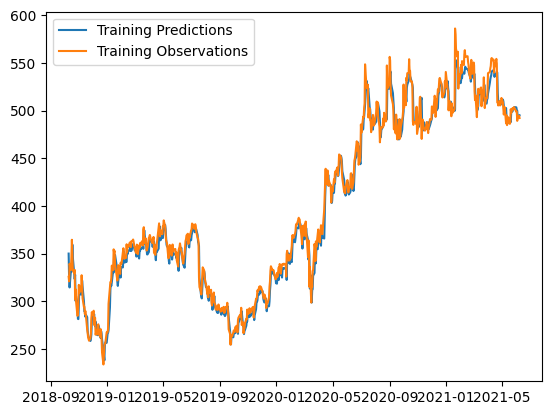

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])


In [ ]:
print(model.predict(X_train))
print(X_train.shape)
print(X_train[-1])

21/21 [==============================] - 0s 7ms/step
[[350.214  ]
 [325.11646]
 [314.6777 ]
 [332.88315]
 [331.18903]
 [340.89963]
 [359.6305 ]
 [346.4336 ]
 [328.3703 ]
 [323.49683]
 [327.99353]
 [300.5773 ]
 [305.65887]
 [297.1692 ]
 [281.78723]
 [281.48993]
 [297.46973]
 [314.08606]
 [307.25708]
 [310.31818]
 [307.3036 ]
 [322.02502]
 [315.84882]
 [299.87354]
 [289.51242]
 [289.9707 ]
 [284.00433]
 [286.19424]
 [283.51987]
 [269.22342]
 [264.77615]
 [261.33008]
 [258.54843]
 [260.72107]
 [265.53687]
 [279.95874]
 [286.65747]
 [283.81287]
 [286.65576]
 [273.92813]
 [278.88556]
 [265.02936]
 [267.05273]
 [264.5605 ]
 [272.43115]
 [274.43848]
 [266.0362 ]
 [261.59952]
 [268.7976 ]
 [266.2305 ]
 [260.16742]
 [248.29378]
 [238.18121]
 [253.71922]
 [257.0231 ]
 [256.63977]
 [266.16553]
 [267.09146]
 [269.5034 ]
 [293.53934]
 [312.80377]
 [317.7838 ]
 [316.3066 ]
 [319.94843]
 [332.73627]
 [330.33203]
 [348.33032]
 [349.24884]
 [348.89136]
 [336.03998]
 [320.6498 ]
 [316.33218]
 [321.6061 

In [ ]:
# val_predictions = model.predict(X_val).flatten()

# plt.plot(dates_val, val_predictions)
# plt.plot(dates_val, y_val)
# plt.legend(['Validation Predictions', 'Validation Observations'])

6/6 [==============================] - 0s 7ms/step


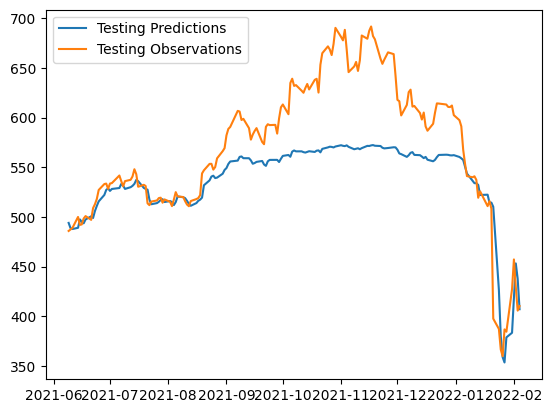

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

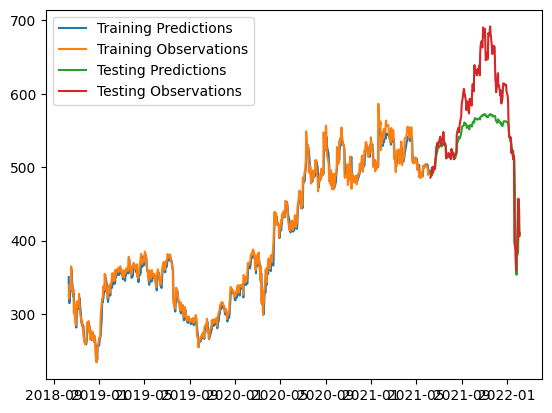

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
# plt.plot(dates_val, val_predictions)
# plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            # 'Validation Predictions', 
            # 'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = dates_test

last_window = deepcopy(X_train[-1])

print(last_window)

for target_date in range(100):
  
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window = last_window + next_prediction
  last_window = last_window[1:] 

print(recursive_predictions)
  

[[507.79]
 [500.86]
 [497.98]
 [501.77]
 [586.34]
 [579.84]
 [565.17]
 [556.78]
 [561.93]
 [523.28]
 [538.6 ]
 [532.39]
 [539.04]
 [548.16]
 [539.45]
 [552.16]
 [550.79]
 [547.92]
 [559.07]
 [563.59]
 [557.59]
 [556.52]
 [557.28]
 [551.34]
 [548.22]
 [540.22]
 [533.78]
 [546.15]
 [553.41]
 [546.7 ]
 [538.85]
 [550.64]
 [547.82]
 [520.7 ]
 [511.29]
 [516.39]
 [493.33]
 [506.44]
 [504.54]
 [523.06]
 [518.02]
 [520.25]
 [524.03]
 [524.44]
 [504.79]
 [512.18]
 [523.11]
 [535.09]
 [520.81]
 [502.86]
 [508.05]
 [513.95]
 [513.39]
 [521.66]
 [539.42]
 [540.67]
 [544.53]
 [546.99]
 [554.58]
 [555.31]
 [552.78]
 [553.73]
 [540.02]
 [549.22]
 [546.54]
 [554.44]
 [549.57]
 [508.9 ]
 [508.78]
 [505.55]
 [510.3 ]
 [505.55]
 [506.52]
 [509.  ]
 [513.47]
 [509.11]
 [503.18]
 [496.08]
 [499.55]
 [503.84]
 [486.69]
 [495.08]
 [484.98]
 [486.66]
 [493.37]
 [488.94]
 [486.28]
 [487.7 ]
 [501.67]
 [497.89]
 [502.9 ]
 [501.34]
 [502.36]
 [503.86]
 [502.81]
 [499.08]
 [499.24]
 [489.43]
 [494.74]
 [494.66]]

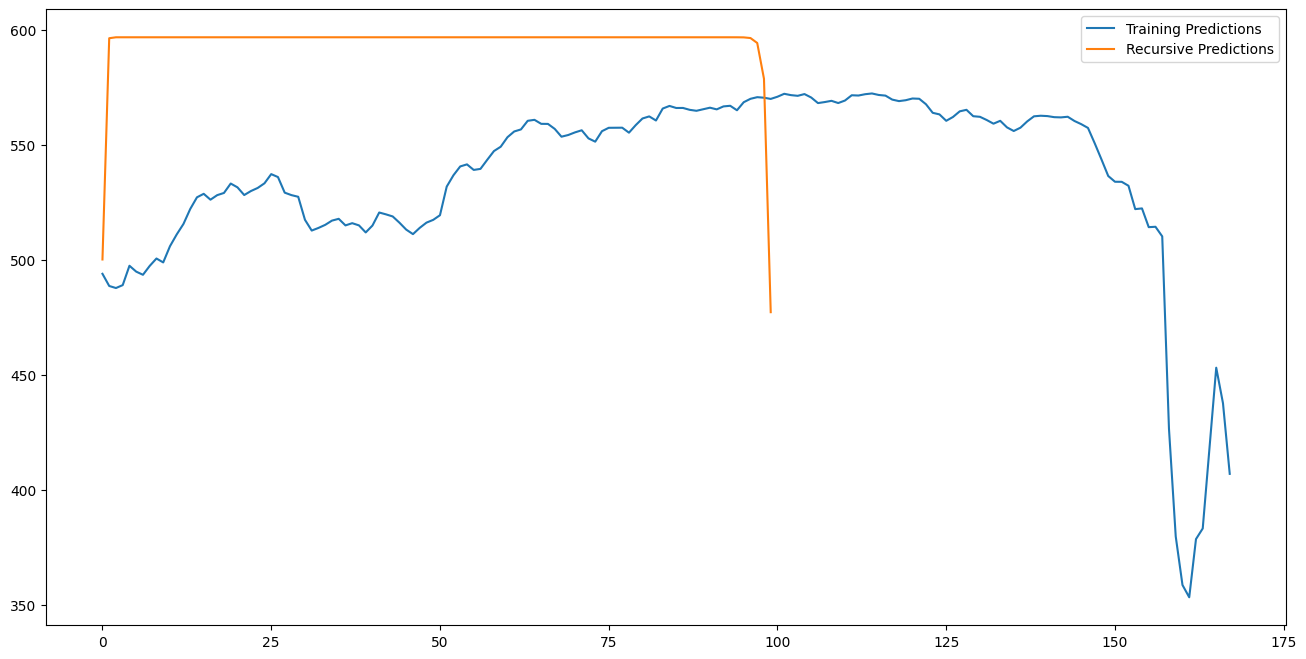

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(test_predictions)
plt.plot(recursive_predictions)
plt.legend(['Training Predictions', 
            'Recursive Predictions'])